# Project 5 WineQulaity

Aim to predict the wine quality from the given dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
data=pd.read_csv('winered.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.shape

(1599, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


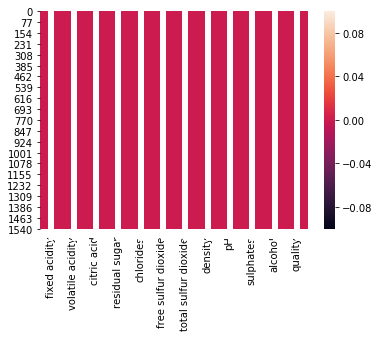

In [8]:
#Lets Check Null Values
sns.heatmap(data.isnull(), annot=True)

In [9]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Statistical Summary

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


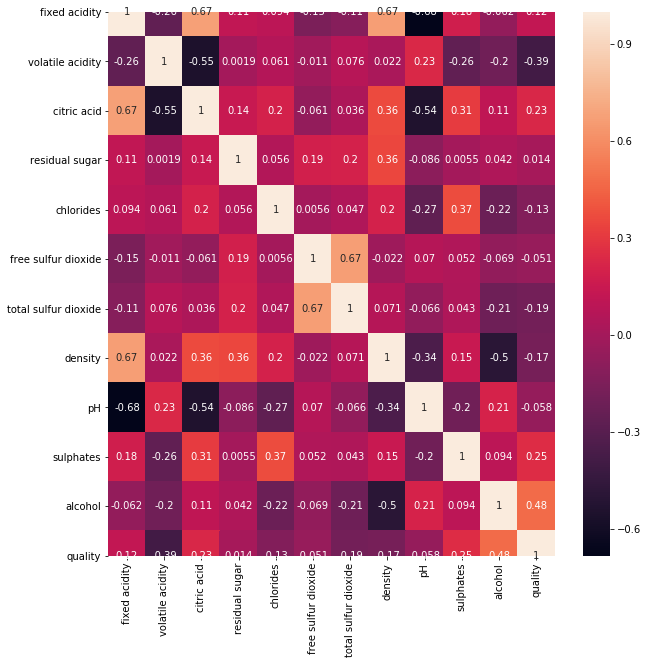

In [11]:
# Lets Check the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)

In [34]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [36]:
for index in data.skew().index:
    if data.skew().loc[index]>0.5:
        data[index]=np.cbrt(data[index])

In [37]:
data.skew()

fixed acidity           0.458470
volatile acidity       -0.070512
citric acid             0.318337
residual sugar          2.032658
chlorides               2.191305
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates               1.046979
alcohol                 0.682972
quality                 0.217802
dtype: float64

## Lets do the EDA

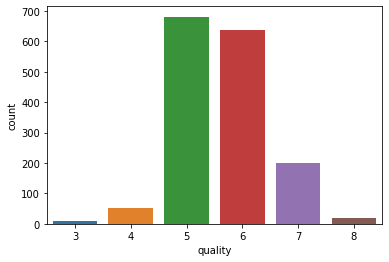

In [38]:
sns.countplot(data['quality'])

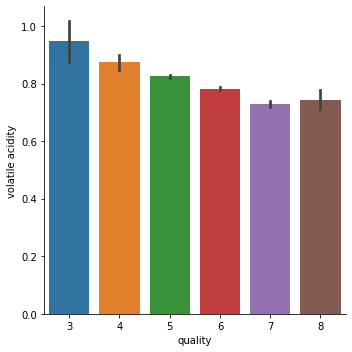

In [39]:
sns.catplot(x='quality',y='volatile acidity',data=data,kind='bar')

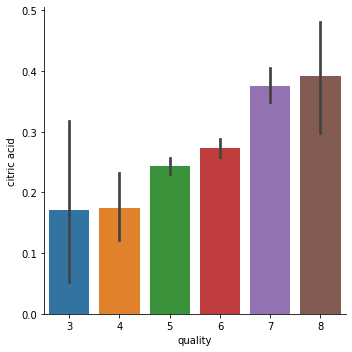

In [40]:
sns.catplot(x='quality',y='citric acid',data=data,kind='bar')

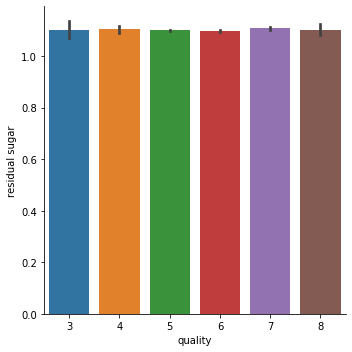

In [41]:
sns.catplot(x='quality',y='residual sugar',data=data,kind='bar')

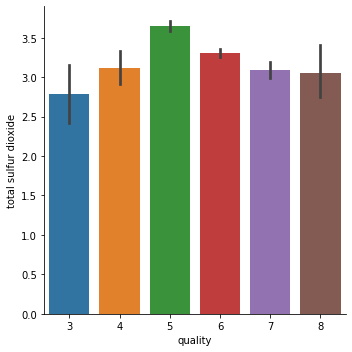

In [42]:
sns.catplot(x='quality',y='total sulfur dioxide',data=data,kind='bar')

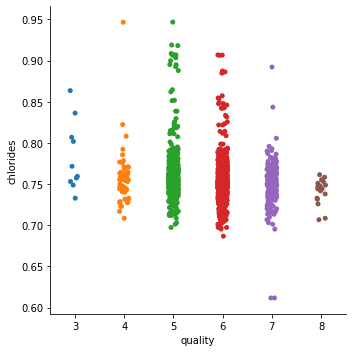

In [43]:
sns.catplot(y='chlorides',x='quality',data=data)

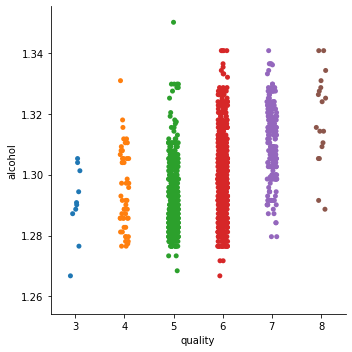

In [44]:
sns.catplot(y='alcohol',x='quality',data=data)

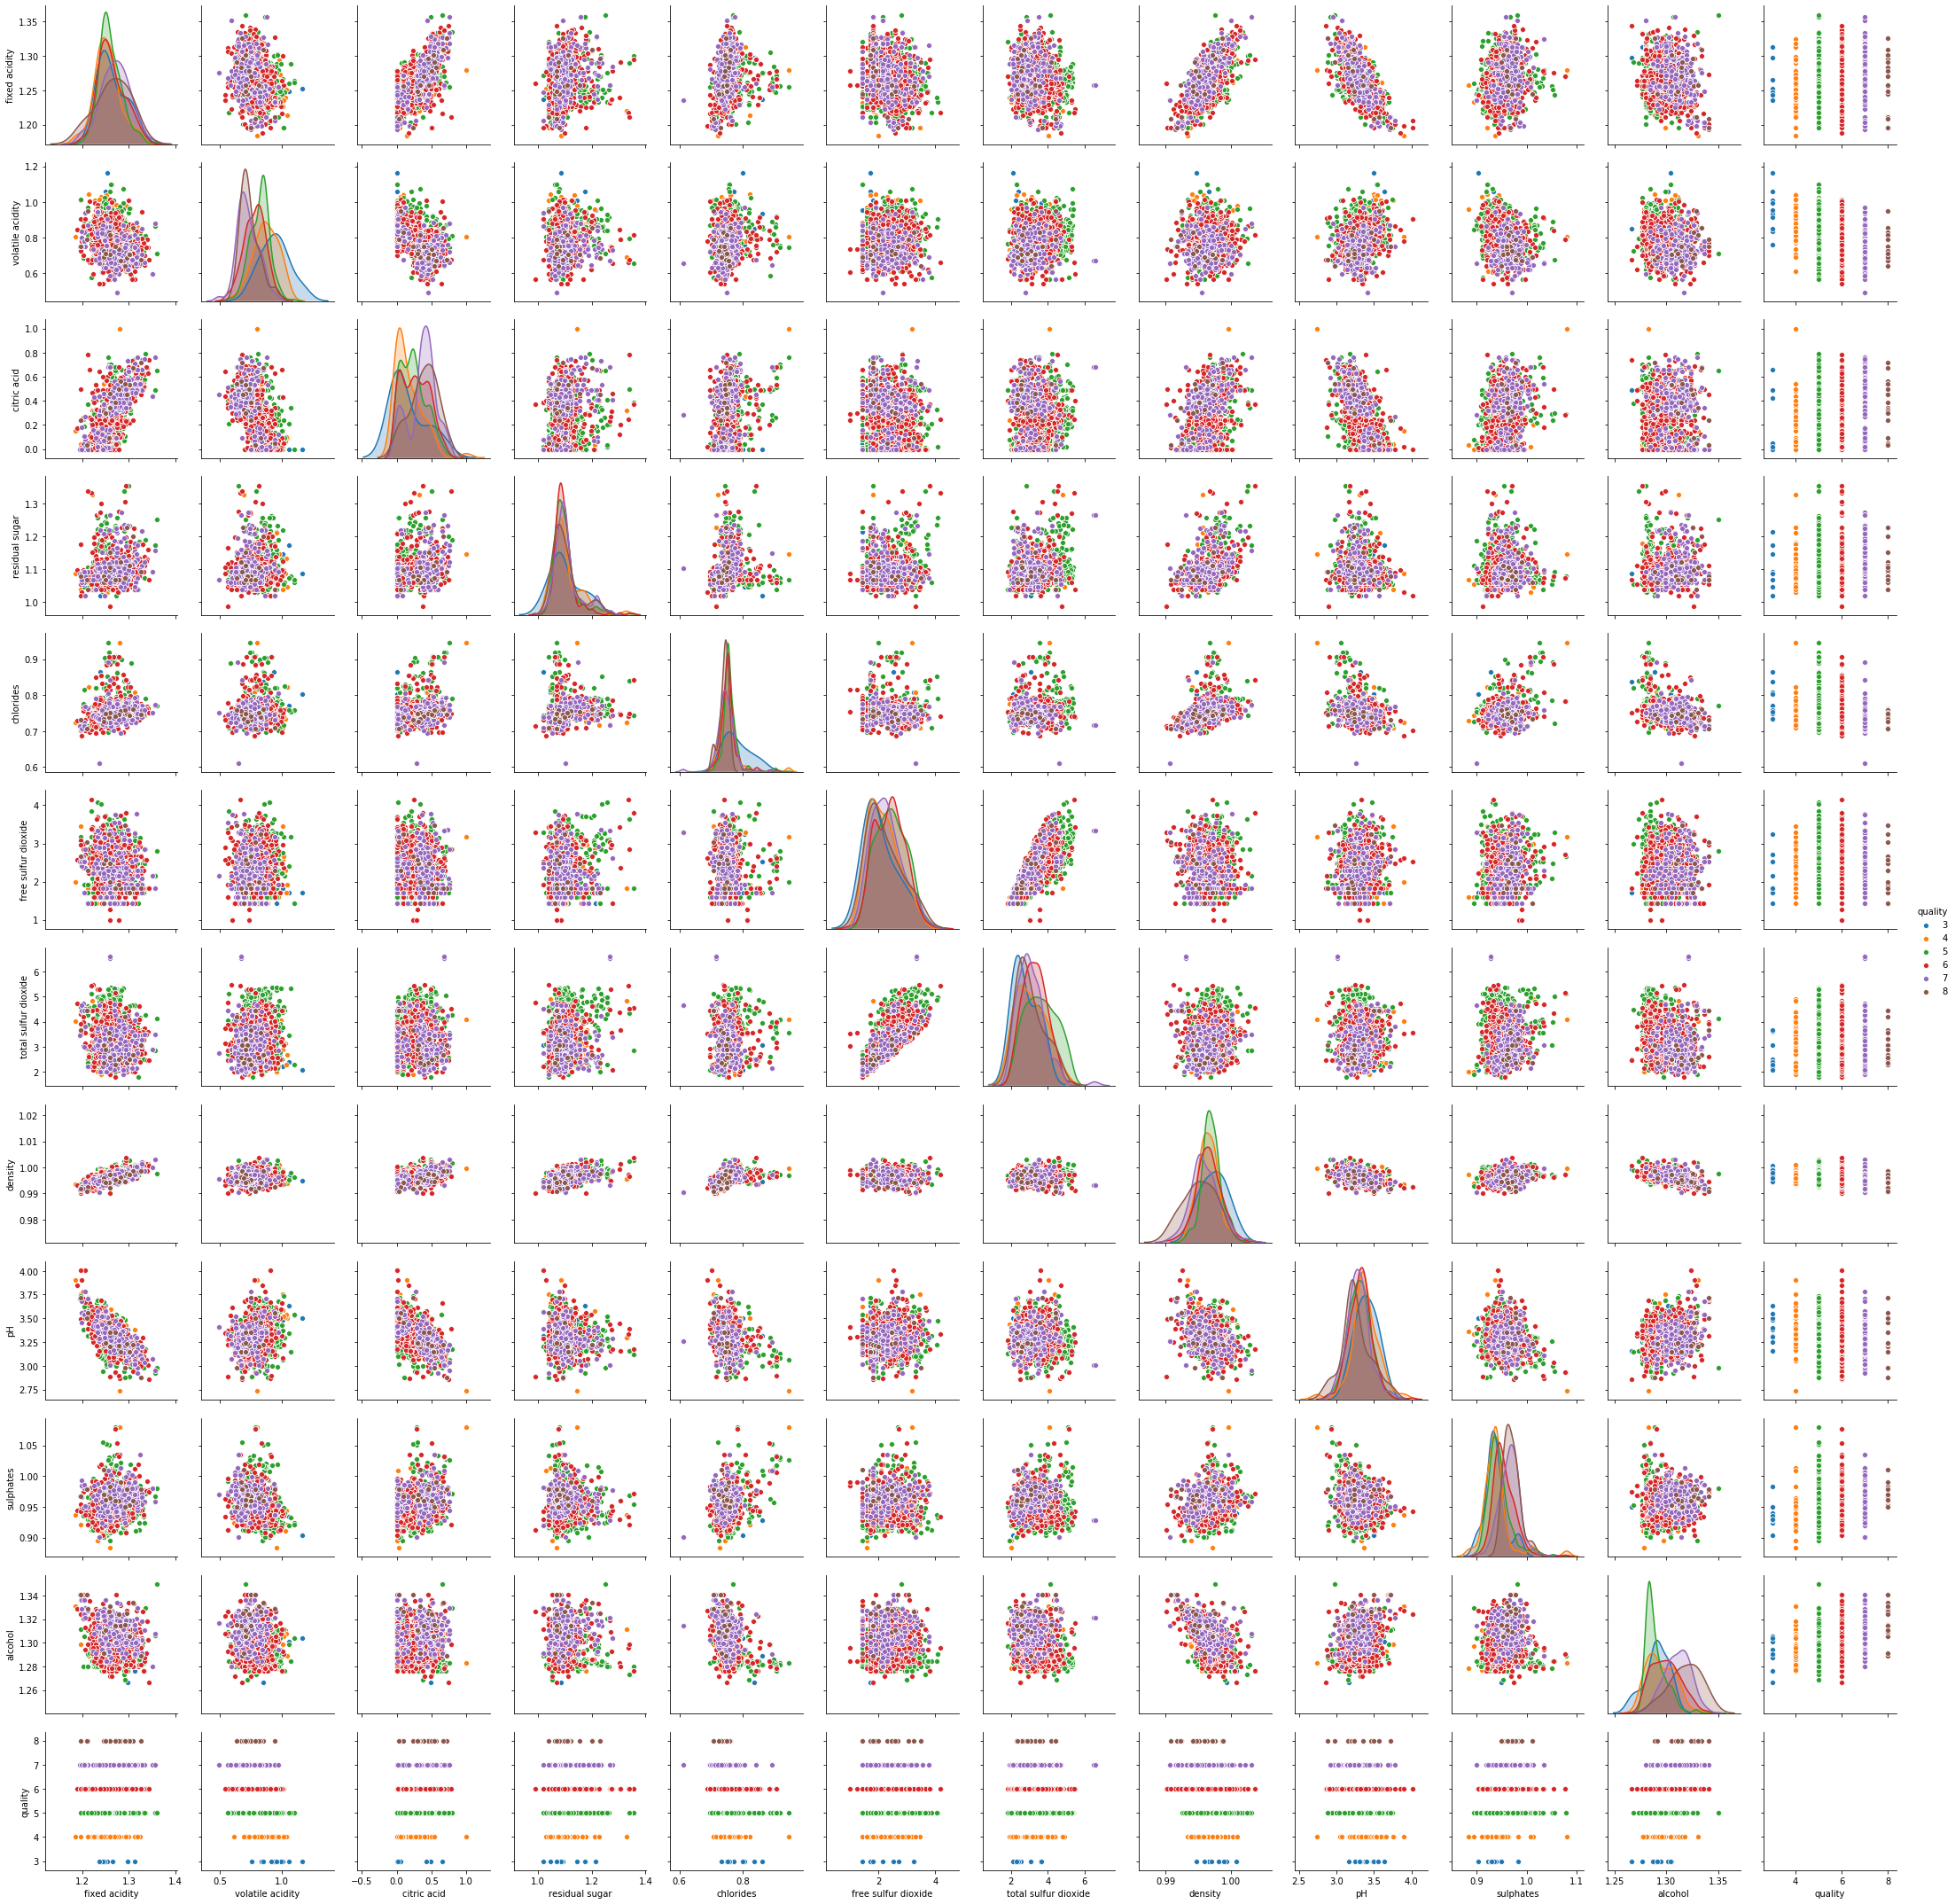

In [45]:
sns.pairplot(data,hue='quality')

## Spliting the independent and dependent variables
 

In [46]:
x=data.iloc[:,:-1]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.249054,0.887904,0.00,1.073922,0.751010,2.223980,3.239612,0.9978,3.51,0.937607,1.282701
1,1.256382,0.958284,0.00,1.112009,0.772528,2.924018,4.061548,0.9968,3.20,0.958054,1.288654
2,1.256382,0.912581,0.04,1.096963,0.767124,2.466212,3.779763,0.9970,3.26,0.953263,1.288654
3,1.307916,0.654213,0.56,1.073922,0.749906,2.571282,3.914868,0.9980,3.16,0.941270,1.288654
4,1.249054,0.887904,0.00,1.073922,0.751010,2.223980,3.239612,0.9978,3.51,0.937607,1.282701


In [47]:
y=data.iloc[:,-1]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [48]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [60]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=40)

In [61]:
x_train.shape,x_test.shape

((959, 11), (640, 11))

In [62]:
y_train.shape,y_test.shape

((959,), (640,))

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [64]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
DTR=DecisionTreeRegressor(random_state=2)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=2)
RFR=RandomForestRegressor(random_state=2)
GBR=GradientBoostingRegressor(random_state=2)

In [65]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [66]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [67]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\ ',name,'/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\ ')
    print('\n')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,2))
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(round(mae,2))
    rmse=np.sqrt(mse)
    print("Mean_Squared_Error =",rmse)
    RMSE.append(round(rmse,2))
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\  LinearRegression /*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\ 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.3824393032508778
Mean_Squared_Error = 0.42208675443265015
Mean_Absolute_Error = 0.499103435123695
Mean_Squared_Error = 0.6496820410267242
Cross_Val_Score =  0.24863867795509678


/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\  Lasso /*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\ 


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  -0.0025249857438507384
Mean_Squared_Error = 0.6851998835058025
Mean_Absolute_Error = 0.6939373696558915
Mean_Squared_Error = 0.8277680130965454
Cross_Val_Score =  -0.13261449590936086


/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\  Ridge /*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\ 


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None

In [68]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.382439,0.42,0.50,0.65,0.248639
1,Lasso,-0.002525,0.69,0.69,0.83,-0.132614
2,Ridge,0.382476,0.42,0.50,0.65,0.248713
3,ElasticNet,-0.002525,0.69,0.69,0.83,-0.132614
4,DecisionTreeRegressor,0.042118,0.65,0.48,0.81,-0.513103
5,KNeighborsRegressor,0.337484,0.45,0.50,0.67,0.118799
6,AdaBoostRegressor,0.356793,0.44,0.54,0.66,0.242208
7,RandomForestRegressor,0.441457,0.38,0.45,0.62,0.193546
8,GradientBoostingRegressor,0.426307,0.39,0.48,0.63,0.257489


From the above comparison of models we can see that the Random Forest Regressor is working the best however it failed to give us R2 more than 90%, so i choose Random Forest Regressor as my final model

Manually Hypertunned, however implementing the classification algorithm by encoding the quality might have given us more accurate result.

In [70]:
from sklearn.externals import joblib
joblib.dump(RFR,"Model_WineRed-Quality.csv")

['Model_WineRed-Quality.csv']

In [71]:
model=joblib.load("Model_WineRed-Quality.csv")

In [72]:
model.predict(x_test)

array([6.8, 5.2, 5.9, 6.9, 5.8, 5.1, 6. , 6.6, 5.3, 5.8, 6.2, 5.7, 5.5,
       6.7, 5.1, 6.5, 5.3, 5.7, 5.1, 5.1, 5. , 5.9, 5. , 5.1, 6.8, 5.5,
       6. , 5.5, 5.3, 5.2, 5.4, 5.9, 5.3, 5.1, 5. , 5.9, 5.7, 5. , 4.7,
       6. , 5.1, 6.1, 5.4, 6. , 6.4, 5.6, 5.6, 6. , 5.6, 5.1, 6.6, 5.2,
       5.2, 5.8, 6.3, 5.2, 5.9, 5. , 5.8, 5.3, 5.9, 5.7, 5.9, 5.1, 5. ,
       5. , 4.7, 5.5, 6.7, 6.5, 5.2, 5.3, 4.8, 6.9, 6. , 5.3, 4.9, 5.9,
       6.1, 6.5, 5.5, 5.9, 6.3, 5.3, 6.2, 5.1, 5.9, 5.2, 6.2, 5.1, 5.7,
       7. , 5.7, 4.8, 6.5, 5.5, 4.9, 6.6, 5.1, 5.9, 5.5, 5.6, 5.5, 6.3,
       6.8, 5.8, 6.7, 5.6, 5.2, 6. , 7. , 4.9, 5.6, 6. , 5.5, 5.2, 5.3,
       6.1, 6.4, 5.2, 5.3, 5.5, 5. , 5.4, 5.1, 5.6, 5.1, 5.1, 6.2, 5.6,
       5.5, 5.7, 6.6, 5.2, 5.6, 5.1, 5.6, 5.9, 5.5, 5.1, 5.8, 4.7, 5.6,
       5.3, 5.2, 6.1, 5.3, 5.2, 6.6, 6.7, 5.6, 6.1, 5.4, 5.3, 6. , 5.3,
       5.5, 7.1, 5.8, 5.9, 6.1, 5.1, 6.7, 7. , 6. , 5.4, 5.4, 5.7, 6.2,
       6. , 5.1, 6.7, 5.5, 5. , 5.3, 5.2, 6.2, 5.1, 5.1, 5.4, 6.